In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, math
import plotly.express as px

In [2]:
df = pd.read_csv("/Users/yuafan/tmp/data_370_signals.csv", header=None)
df.columns=["t_ms", "GPS0", "GPS1", "FuelRate", "VehicleSpeed"]

VACT_EPOCH = datetime.datetime(year=2011, month=6, day=16, hour=5, minute=23, second=0)
df['datetime'] = df['t_ms'].apply(lambda x: VACT_EPOCH + datetime.timedelta(milliseconds=int(x)))
df["lon"] = df["GPS0"]*180/math.pi
df["lat"] = df["GPS1"]*180/math.pi

df

,t_ms,GPS0,GPS1,FuelRate,VehicleSpeed,datetime,lon,lat
0,3.418800e+07,1.003192,0.210898,NaN,NaN,2011-06-16 14:52:48,57.478645,12.083557
1,3.419600e+07,1.003192,0.210898,NaN,NaN,2011-06-16 14:52:56,57.478645,12.083559
2,3.419800e+07,1.003192,0.210898,NaN,NaN,2011-06-16 14:52:58,57.478644,12.083558
3,3.420000e+07,1.003192,0.210898,NaN,NaN,2011-06-16 14:53:00,57.478643,12.083558
4,3.420200e+07,1.003192,0.210898,NaN,NaN,2011-06-16 14:53:02,57.478643,12.083558
...,...,...,...,...,...,...,...,...
14554375,1.304889e+11,1.003193,0.210898,0.0,0.0,2015-08-04 12:18:44,57.478725,12.083567
14554376,1.304889e+11,1.003193,0.210898,0.0,0.0,2015-08-04 12:18:46,57.478723,12.083568
14554377,1.304889e+11,1.003193,0.210898,0.0,0.0,2015-08-04 12:18:48,57.478722,12.083568
14554378,1.304890e+11,1.003193,0.210898,0.0,0.0,2015-08-04 12:18:50,57.478721,12.083567


In [5]:
t_interval = [datetime.datetime.strptime("2012-05-01", '%Y-%m-%d') + datetime.timedelta(days=xx) for xx in range(31)]
df['datetime'] = pd.to_datetime(df['datetime'])

df_selected = df[(df['datetime'] >= t_interval[0]) & (df['datetime'] < t_interval[1])]

fig = px.scatter_mapbox(df_selected, lat="lon", lon="lat", hover_name="datetime", zoom=3)#, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(-10.0, 100.0)

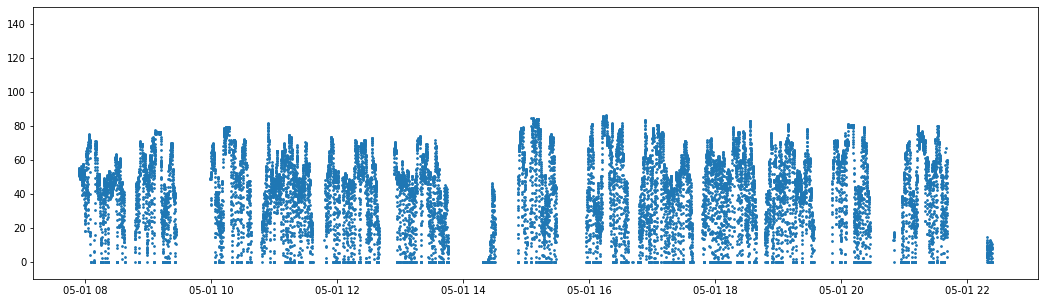

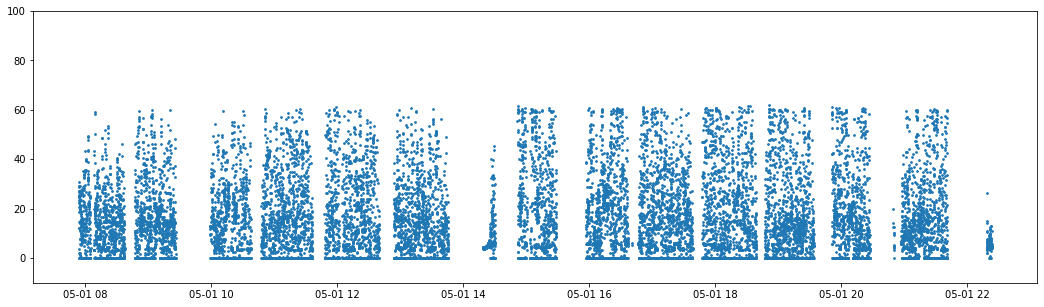

In [7]:
plt.figure(figsize=(18, 5))
plt.scatter(df_selected['datetime'], df_selected["VehicleSpeed"], s=3)
plt.ylim(-10, 150)

plt.figure(figsize=(18, 5))
plt.scatter(df_selected['datetime'], df_selected["FuelRate"], s=3)
plt.ylim(-10, 100)